In [449]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

In [450]:
# Gets src path 
src_path = os.path.dirname(os.getcwd())

# Adds src_path if it doesn't exist in sys.path (to access utils)
if os.path.exists(src_path) and src_path not in sys.path:
    sys.path.append(src_path)
    
import src.utils.data_tools as dt
import src.utils.viz_tools as vt

In [86]:
df_main = pd.read_csv('./src/data/processed/main_data.csv')
df_main['Education_lv'] = df_main['Education_lv'].fillna('None')

In [458]:
def plot_categorical_distribution(df, cat_columns, *, relative = False, show_values = False, custom_labels = False, rotation = 45, palette = 'viridis'):
    '''   
    Generates bar plots to visualize the distribution of categorical variables in a given DataFrame. Allows for plotting either the absolute or relative frequencies of the categories for each specified column. Additionally, the function provides options to display frequency values directly on the bars, apply custom labels, rotate the x-axis labels, and choose a color palette.

    Parameters:
        df (pd.DataFrame): 
            DataFrame containing the data to plot. It should include the categorical columns specified in `cat_columns`.
        
        cat_columns (list of str): 
            List of column names (strings) corresponding to the categorical variables to visualize.

        relative (bool, optional, default=False): 
            If True, the function will plot the relative frequencies of the categories. If False, it will plot the absolute frequencies.

        show_values (bool, optional, default=False): 
            If True, the function will display the frequency values directly on top of the bars in the plot.

        custom_labels (dict of {str: list}, optional, default=False): 
            If provided, this dictionary should map column names to lists of custom labels to use for the x-axis ticks. The keys should be column names from `cat_columns`, and the values should be lists of labels corresponding to the categories in that column.

        rotation (int, optional, default=45): 
            Angle (in degrees) to rotate the x-axis labels for better readability.

        palette (str, optional, default='viridis'): 
            Color palette to use for the bars. If an empty string is provided, 'viridis' will be used as the default.

    Returns:
        None: 
            This function does not return any objects. It generates and displays a set of bar plots showing the frequency distributions of the specified categorical variables.
    '''
    
    # Determine the number of columns and rows needed for the subplot grid
    columns = len(cat_columns)
    rows = (columns // 3) + (1 if columns % 3 != 0 else 0)
    
    # Create the base figure and a grid of subplots with the specified size
    fig, axes = plt.subplots(rows, 3, figsize = (15, 6 * rows))
    axes = axes.flatten() 
    if palette == '':
        palette = 'viridis'
    
    # Plot the frequency distribution for each categorical column
    for i, col in enumerate(cat_columns):
        ax = axes[i]
        if relative:
            # Calculate and plot the relative frequencies
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x = serie.index, y = serie, ax = ax, palette = palette, hue = serie.index, legend = False)
            ax.set_ylabel('Relative Frequency')
        else:
            # Calculate and plot the absolute frequencies
            serie = df[col].value_counts()
            sns.barplot(x = serie.index, y = serie, ax = ax, palette = palette, hue = serie.index, legend = False)
            ax.set_ylabel('Absolute Frequency')

        # Set the title, ticks, grid and spine
        ax.set_title(f'{col}', ha = 'center', y = 1.025)
        ax.set_xlabel('')
        ax.tick_params(colors = '#565656')
        ax.tick_params(axis = 'x', rotation = rotation, colors = 'k')
        ax.grid(axis = 'y', color = '#C6C9CC', linewidth = 0.4)
        ax.set_axisbelow(True)
        ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
        
        if custom_labels:
            # Set custom labels
            labels = custom_labels[col]
            ticks = range(len(labels))
            ax.set_xticks(ticks = ticks, labels = labels)

        if show_values:
            # Annotate each bar with its height (the frequency value)
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}' if relative else f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), 
                            ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
                
    # Hide any unused subplots if the number of categorical columns is odd
    for j in range(i + 1, rows * 3):
        axes[j].axis('off')
    
    # Set figure title
    plt.suptitle('Categorical Distribution', ha = 'center', y = 1.01, fontproperties = {'weight': 600, 'size': 14})
        
    # Adjust the layout to prevent overlap and display the plots
    plt.tight_layout(h_pad = 3, w_pad = 5)
    plt.show()

In [451]:
main_clasif = dt.classify_by_cardinality(df_main)
column_selection = main_clasif.loc[main_clasif['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical = column_selection.index.to_list()

new_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Education_lv': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'Family_History_Alzheimers': ['No', 'Yes'],
    'CVD': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'Head_Injury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'Memory_Complaints': ['No', 'Yes'],
    'Behavioral_Problems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'Personality_Changes': ['No', 'Yes'],
    'Difficulty_Completing_Tasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes'],
    'DX': ['No AD', 'AD']
}

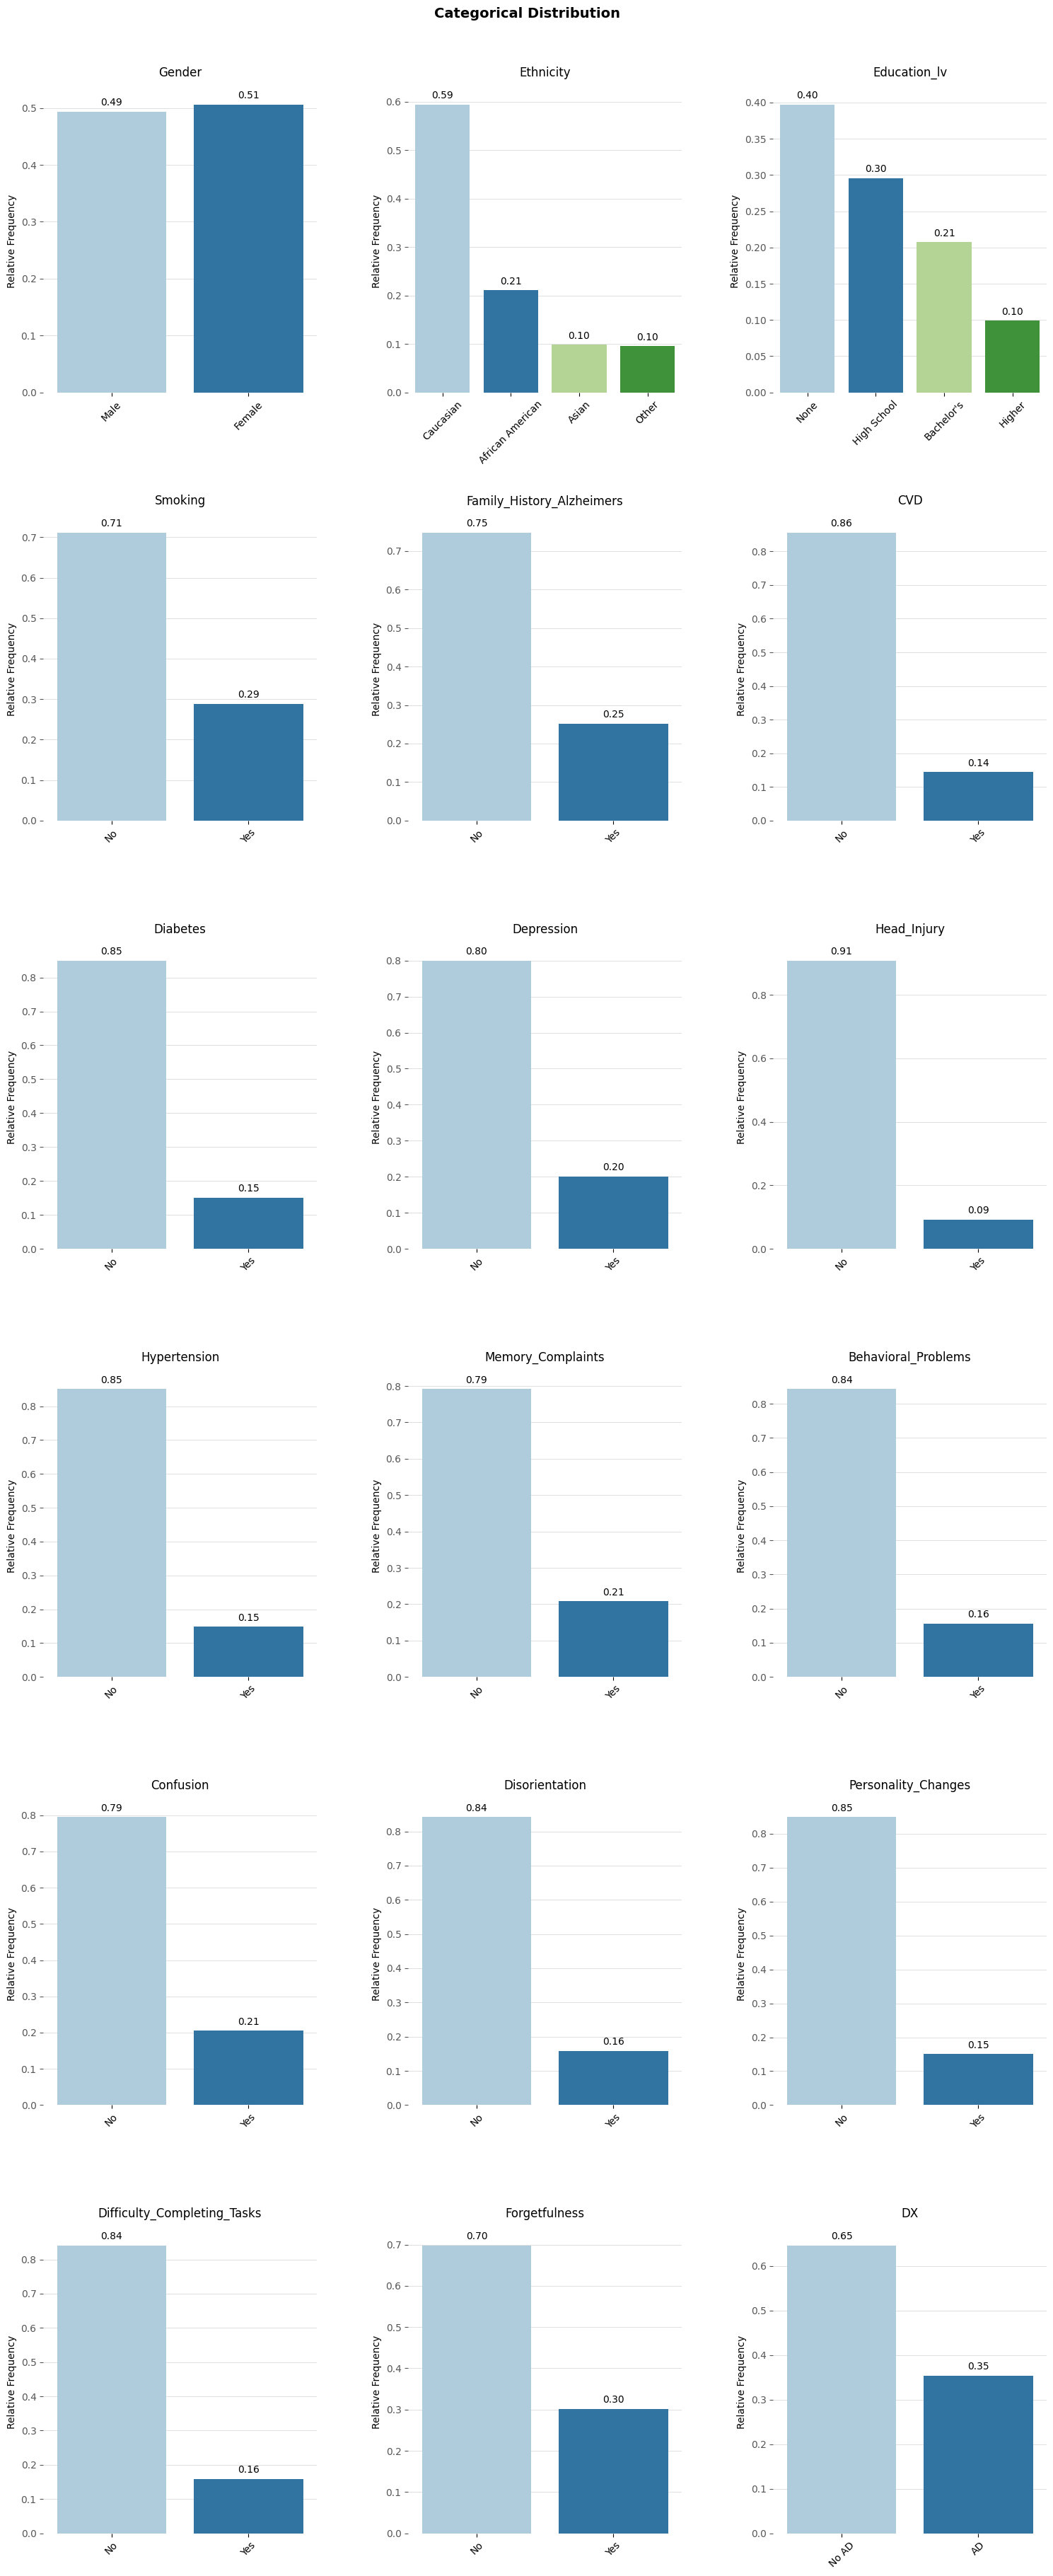

In [459]:
plot_categorical_distribution(df_main, categorical, custom_labels= new_labels, relative = True, palette = 'Paired', show_values=True)

In [83]:
def custom_scatter_plot(df, x, y, color_col = None, size_col = None, scale = 1, legend = 'auto'):
    fig, ax = plt.subplots(figsize = (20, 10))
        
    # Scatter plot
    if type(size_col) == str:
        if size_col != '':
            if color_col:
                sp = plt.scatter(x = df[x], y = df[y], c = df[color_col], s = df[size_col] * scale, cmap = 'viridis', alpha = 0.5)
            else:
                sp = plt.scatter(x = df[x], y = df[y], s = df[size_col] * scale, cmap = 'viridis', alpha = 0.5)
        elif color_col:
            sp = plt.scatter(x = df[x], y = df[y], c = df[color_col], cmap = 'viridis', alpha = 0.5)
    else:
        plt.scatter(x = df[x], y = df[y], s = df[size_col] * scale, cmap = 'viridis', alpha = 0.5)
    
    # Legend
    handles, labels = sp.legend_elements('sizes', num = 6)
    for handle in handles:
        handle.set_markerfacecolor('#CCCCCC')
        handle.set_markeredgecolor('#CCCCCC')
    
    if legend == 'colorbar':
        plt.legend(handles, labels, ncol = 3, title = size_col, title_fontsize = 'small', fontsize = 'small', frameon = False, loc = 'upper right', labelspacing = 2)
        plt.colorbar(label = f'{color_col}')
        # plt.clim(df[color_col].min(), df[color_col].max()) # No hacer esto, porque tendría en cuenta los outliers y descolocaría el resto de colores
        plt.clim(0, 7)
    else:  
        plt.legend(handles, labels, ncol = 3, title = size_col, title_fontsize = 'small', fontsize = 'small', frameon = False, loc = 'upper right', labelspacing = 2)
    
    # Figure presentation
    if legend == 'colorbar': # This fixes title horizontal alignment (not centered in colorbar option)
        plt.suptitle(f'Scatter plot: {x}, {y}{(f', {color_col}') if color_col else ''}{(f', {size_col}') if size_col else ''}', x = 0.47, y = 0.92, weight = 'bold') 
    else:
        plt.suptitle(f'Scatter plot: {x}, {y}{(f', {color_col}') if color_col else ''}{(f', {size_col}') if size_col else ''}', x = 0.5, y = 0.92, weight = 'bold')
        
    plt.xlabel(x)
    plt.ylabel(y)
    ax.spines[['top', 'right', 'bottom', 'left']].set_color('#d3d3d3')
    ax.tick_params(colors = '#565656')

In [5]:
def edu_clasif(years):
    if years > 18:
        level = 'Higher'
    elif years >= 16:
        level = 'Bachelors'
    elif years >= 12:
        level = 'High School'
    else:
        level = 'None'
    return level

#### REVIEW AND UPDATE

In [ ]:
def plot_cat_dist(df, cat_columns, relative = False, show_values = False, rotation = 45, palette = 'viridis'):
    '''
    Generates bar plots to visualize the distribution of categorical variables in a given DataFrame. Allows to plot the absolute or relative frequencies of the categories for each specified column. Additionally, it provides options to display the frequency values directly on the bars and to rotate the x-axis labels for better readability.

    Parameters:

        df (pd.DataFrame): DataFrame containing the data to plot. It should include the categorical columns specified in cat_columns.
        cat_columns (list of str): List of column names (strings) corresponding to the categorical variables to visualize.
        relative (bool, optional, default=False): If True, the function will plot the relative frequencies of the categories. If False, it will plot the absolute frequencies.
        show_values (bool, optional, default=False): If True, the function will display the frequency values directly on top of the bars in the plot.
        rotation (int, optional, default=45): Angle (in degrees) to rotate the x-axis labels.
        palette (str, optional, default='viridis'): Color palette to use for the bars.
    
    Returns:
        This function does not return any objects. It generates and displays a set of bar plots showing the frequency distributions of the specified categorical variables.
    '''
    
    # Determine the number of columns and rows needed for the subplot grid
    columns = len(cat_columns)
    rows = (columns // 2) + (columns % 2)
    
    # Create the base figure and a grid of subplots with the specified size
    fig = sp.make_subplots(rows = rows, cols = 2, subplot_titles = cat_columns)
    
    # Plot the frequency distribution for each categorical column
    for i, col in enumerate(cat_columns):
        row = (i // 2) + 1
        col_index = (i % 2) + 1
        
        if relative:
            # Calculate and plot the relative frequencies
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total).reset_index()
            serie.columns = [col, 'Frequency']
        else:
            # Calculate and plot the absolute frequencies
            serie = df[col].value_counts().reset_index()
            serie.columns = [col, 'Frequency']
        
        # Create a bar plot using plotly
        bar_fig = px.bar(serie, x = col, y = 'Frequency', text = 'Frequency', color = col, 
                         color_discrete_sequence = px.colors.sequential.Viridis)
        
        # Add the bar plot to the subplot figure
        fig.add_trace(bar_fig.data[0], row = row, col = col_index)
        
        # Rotate x-axis labels
        fig.update_xaxes(tickangle = rotation, row = row, col = col_index)
        
         # If show_values is True, show frequency values on the bars
        if show_values:
            fig.update_traces(texttemplate = '%{text:.2f}', textposition = 'outside', row = row, col = col_index)
             
    # Adjust layout and titles
    fig.update_layout(height = 300 * rows, width = 900, title_text = "Categorical Distributions", showlegend = False)
    
    # Show the interactive plot
    fig.show()

In [7]:
def bar_donut_chart(df, variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA'] 

    category_counts = df[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize = (14, 4)) 

    bars = axs[0].barh(category_counts.index, category_counts.values, color = colors)
    axs[0].set_title(f'{variable} Distribution', fontsize = 16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha = 'left', va = 'center', color = 'black', fontsize = 10)

    status_counts = df[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc = 'white')
    plt.gca().add_artist(centre_circle)
    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()